In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime
import plotly.express as px

In [8]:
df = pd.read_json('fire-incidents_2.json')

In [9]:
df.head()

,mutl_aid,exp_no,majorcategory,shift,geopoint,alarmtime,current_fmz,indicentdesc,incitypedesc,station,longitude,streetaddress,year,latitude,incidentnum,current_district,incidentcode
0,N,0,EMS,A,"{'lat': 35.778777, 'lon': -78.829423}",2017-06-22T15:04:08+00:00,5B,EMS,"Medical assist, assist EMS crew",005,-78.829423,108 SWISS LAKE DR,2017,35.778777,17-0004709,005,311
1,N,0,EMS,A,"{'lat': 35.798948, 'lon': -78.880793}",2017-06-22T13:11:56+00:00,7C,EMS,"EMS call, excluding vehicle accident with injury",007,-78.880793,5077 SEARS FARM RD,2017,35.798948,17-0004708,007,321
2,N,0,GOODINTENT,A,"{'lat': 35.820615, 'lon': -78.901049}",2017-06-22T07:56:55+00:00,8C,GOOD INTENT,HazMat release investigation w/no HazMat,008,-78.901049,10110 GREEN LEVEL CHURCH RD,2017,35.820615,17-0004702,008,671
3,N,0,FALSEALARM,B,"{'lat': 35.80051, 'lon': -78.830895}",2017-06-21T19:19:39+00:00,5A,FALSE ALARM,"Carbon monoxide detector activation, no CO",005,-78.830895,768 CRABTREE CROSSING PKWY,2017,35.800510,17-0004698,005,746
4,N,0,FALSEALARM,B,"{'lat': 35.752733, 'lon': -78.736962}",2017-06-21T14:48:10+00:00,9A,FALSE ALARM,"Smoke detector activation, no fire - unintenti...",009,-78.736962,110 CORNING RD,2017,35.752733,17-0004689,009,743


In [10]:
df.isnull().sum()

mutl_aid             0
exp_no               0
majorcategory        0
shift                0
geopoint            26
alarmtime            0
current_fmz         32
indicentdesc        46
incitypedesc         0
station             75
longitude           26
streetaddress        4
year                 0
latitude            26
incidentnum          0
current_district    32
incidentcode         0
dtype: int64

In [12]:
df.fillna('NULL', inplace = True)

In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 46855 entries, 0 to 46854
Data columns (total 17 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   mutl_aid          46855 non-null  object
 1   exp_no            46855 non-null  int64 
 2   majorcategory     46855 non-null  object
 3   shift             46855 non-null  object
 4   geopoint          46855 non-null  object
 5   alarmtime         46855 non-null  object
 6   current_fmz       46855 non-null  object
 7   indicentdesc      46855 non-null  object
 8   incitypedesc      46855 non-null  object
 9   station           46855 non-null  object
 10  longitude         46855 non-null  object
 11  streetaddress     46855 non-null  object
 12  year              46855 non-null  int64 
 13  latitude          46855 non-null  object
 14  incidentnum       46855 non-null  object
 15  current_district  46855 non-null  object
 16  incidentcode      46855 non-null  int64 
dtypes: int64(3),

In [14]:
df['alarmtime'] = pd.to_datetime(df['alarmtime'])

In [15]:
time = df['alarmtime'].iloc[0]
df['Hour'] = df['alarmtime'].apply(lambda time: time.hour)
df['Month'] = df['alarmtime'].apply(lambda time: time.month)
df['Day of Week'] = df['alarmtime'].apply(lambda time: time.dayofweek)

In [16]:
dmap={0:'Mon',1:'Tue',2:'Wed',3:'Thu',4:'Fri',5:'Sat',6:'Sun'}
df['Day of Week']= df['Day of Week'].map(dmap)

<AxesSubplot:xlabel='Day of Week', ylabel='count'>

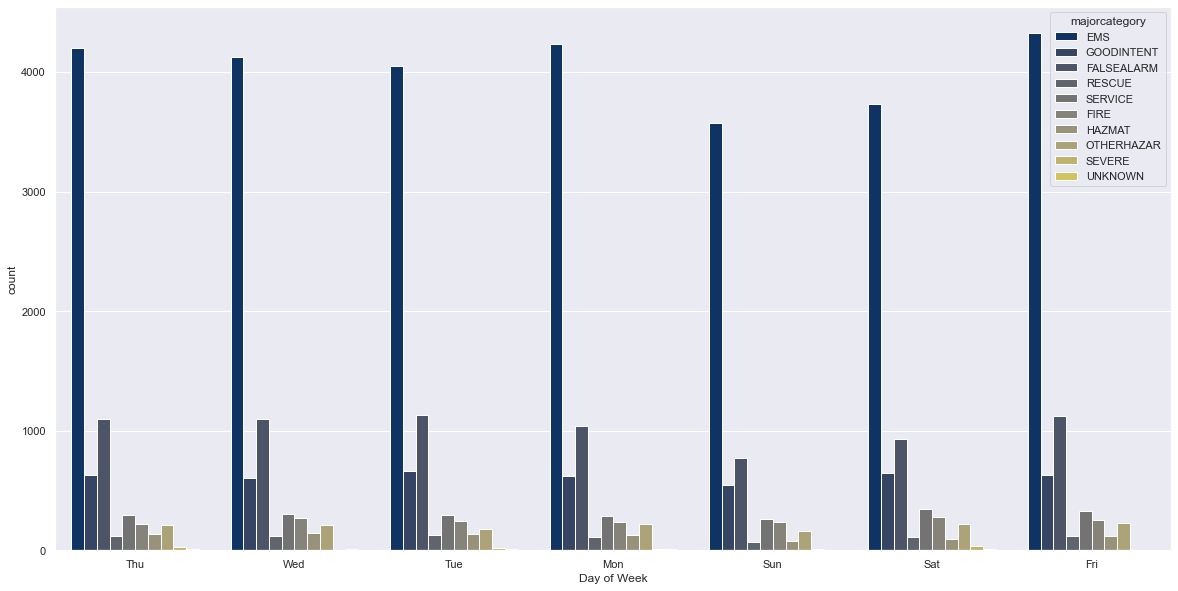

In [17]:
sns.set(rc={'figure.figsize':(20,10)})
sns.countplot(x = 'Day of Week', data = df, hue='majorcategory', palette = 'cividis')

In [18]:
byMonth = df.groupby('Month').count()
byMonth.head()

,mutl_aid,exp_no,majorcategory,shift,geopoint,alarmtime,current_fmz,indicentdesc,incitypedesc,station,longitude,streetaddress,year,latitude,incidentnum,current_district,incidentcode,Hour,Day of Week
Month,,,,,,,,,,,,,,,,,,,
1,4139,4139,4139,4139,4139,4139,4139,4139,4139,4139,4139,4139,4139,4139,4139,4139,4139,4139,4139
2,3761,3761,3761,3761,3761,3761,3761,3761,3761,3761,3761,3761,3761,3761,3761,3761,3761,3761,3761
3,4045,4045,4045,4045,4045,4045,4045,4045,4045,4045,4045,4045,4045,4045,4045,4045,4045,4045,4045
4,4094,4094,4094,4094,4094,4094,4094,4094,4094,4094,4094,4094,4094,4094,4094,4094,4094,4094,4094
5,4256,4256,4256,4256,4256,4256,4256,4256,4256,4256,4256,4256,4256,4256,4256,4256,4256,4256,4256


<AxesSubplot:xlabel='Month'>

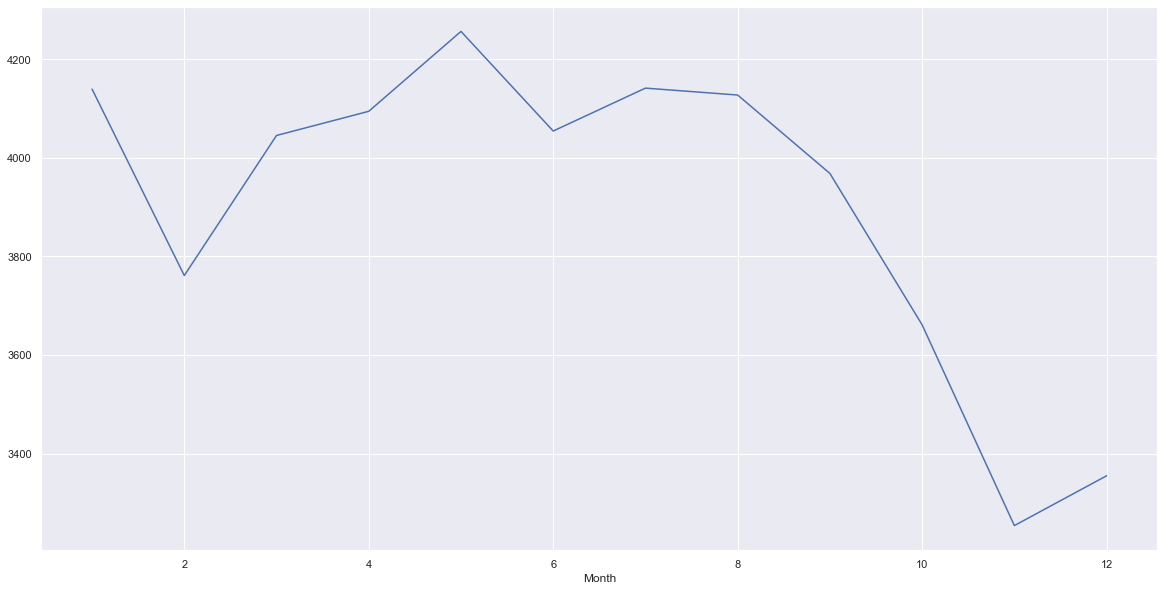

In [19]:
byMonth['exp_no'].plot()

In [20]:
df['Date'] = df['alarmtime'].apply(lambda p:p.date())

<function matplotlib.pyplot.tight_layout(*, pad=1.08, h_pad=None, w_pad=None, rect=None)>

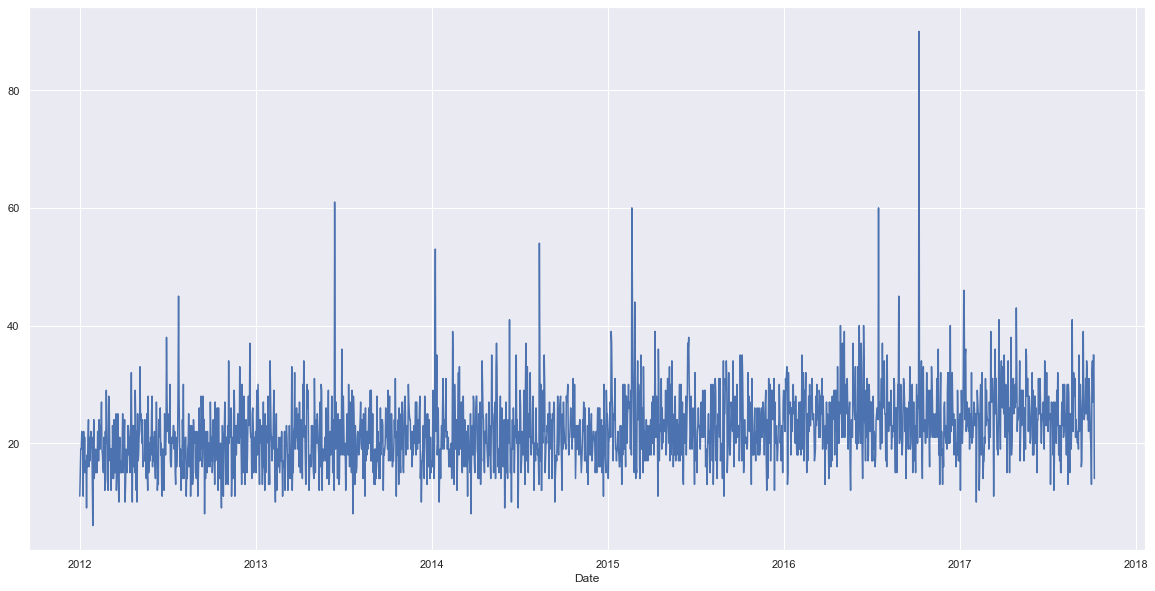

In [21]:
df.groupby('Date').count()['exp_no'].plot()
plt.tight_layout

In [22]:
dayHour = df.groupby(by=['Day of Week','Hour']).count()['incidentnum'].unstack()
dayHour.head()

Hour,0,1,2,3,4,5,6,7,8,9,...,14,15,16,17,18,19,20,21,22,23
Day of Week,,,,,,,,,,,,,,,,,,,,,
Fri,166,150,128,109,121,160,155,241,345,404,...,383,401,387,441,395,371,311,297,257,221
Mon,128,128,133,107,109,120,178,304,371,427,...,384,395,403,359,392,327,297,272,211,164
Sat,178,132,128,119,126,124,151,178,263,300,...,372,360,342,352,356,364,359,278,247,206
Sun,165,127,139,140,101,103,131,166,260,286,...,339,339,293,332,340,330,245,245,207,160
Thu,150,156,109,98,108,119,172,258,357,399,...,391,384,386,418,413,354,320,261,223,185


<AxesSubplot:xlabel='Hour', ylabel='Day of Week'>

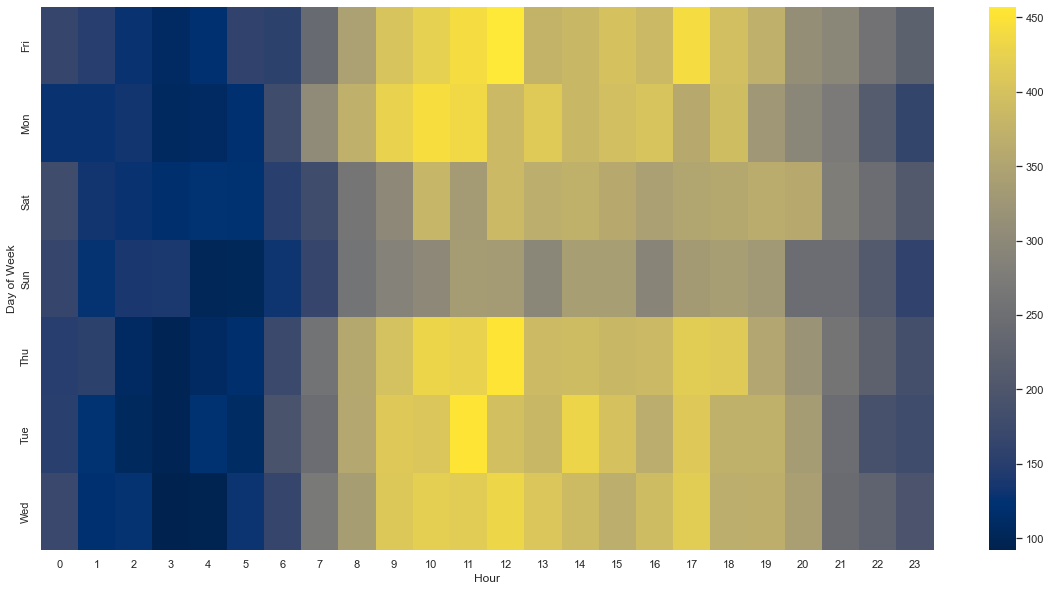

In [23]:
sns.heatmap(dayHour, cmap='cividis')

In [24]:
dayMonth = df.groupby(by=['Day of Week', 'Month']).count()['incidentnum'].unstack()
dayMonth.head()

Month,1,2,3,4,5,6,7,8,9,10,11,12
Day of Week,,,,,,,,,,,,
Fri,617,570,664,628,655,673,635,629,605,534,452,477
Mon,548,597,573,590,627,608,632,598,557,548,479,532
Sat,563,478,584,552,548,526,531,590,571,520,486,453
Sun,530,497,457,518,540,477,508,501,456,418,413,399
Thu,639,592,587,605,651,634,564,556,600,557,484,490


<AxesSubplot:xlabel='Month', ylabel='Day of Week'>

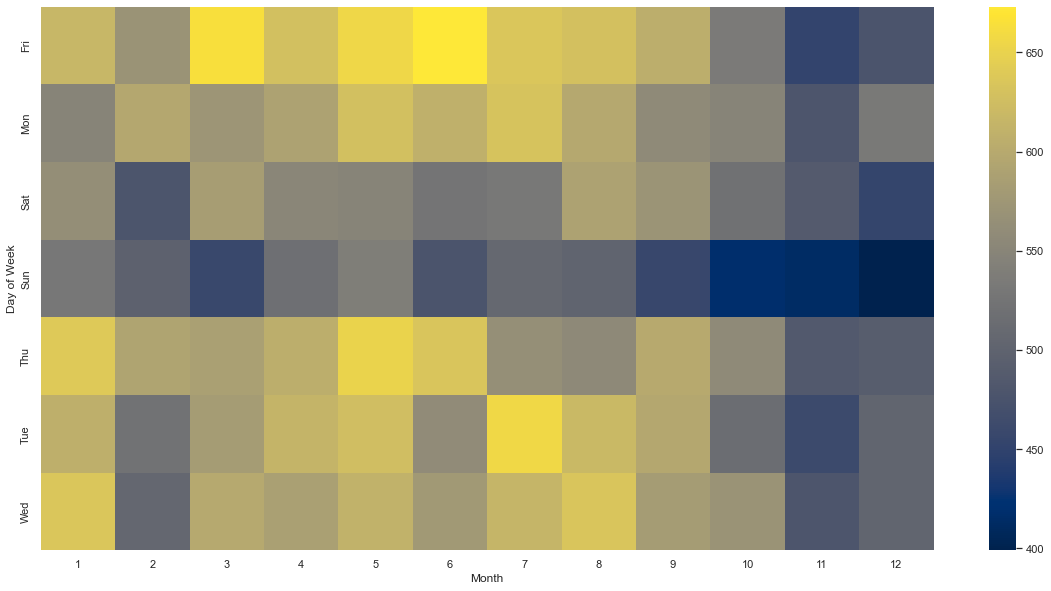

In [25]:
sns.heatmap(dayMonth, cmap='cividis')

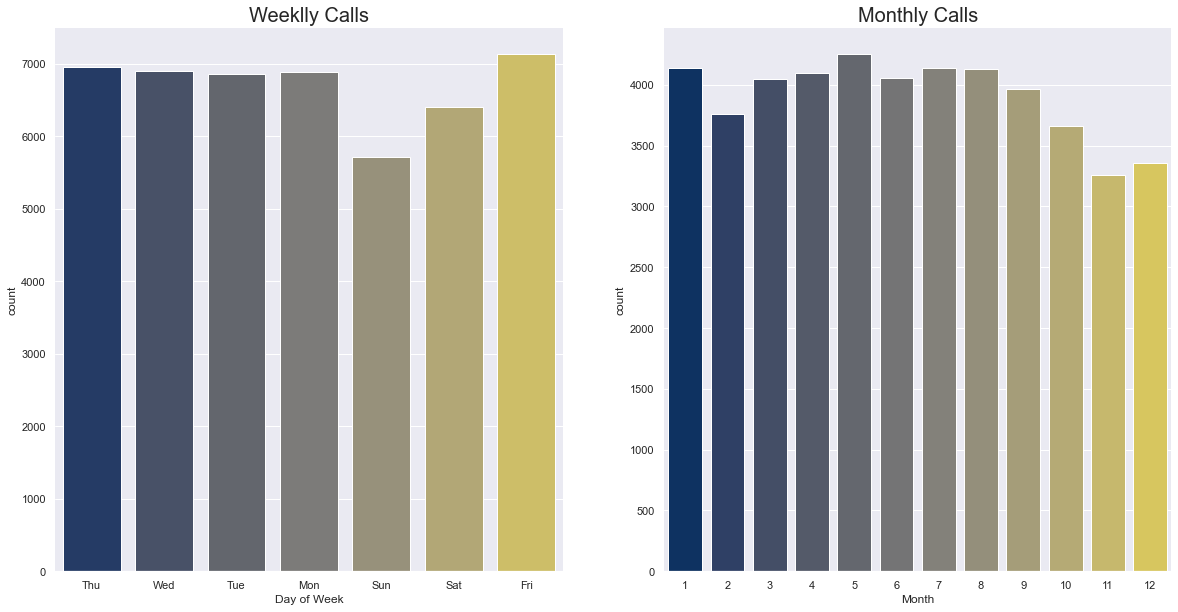

In [26]:
fig, axes = plt.subplots(1,2, figsize = (20,10))
sns.countplot(x='Day of Week', data = df, palette= 'cividis',ax = axes[0])
axes[0].set_title('Weeklly Calls', size = 20)

sns.countplot(x ='Month', data = df, palette= 'cividis',ax=axes[1])
axes[1].set_title('Monthly Calls' ,size = 20)

sns.despine(bottom=False, left= True)


In [27]:
df['Day of Week'].value_counts()\
                .head(20)\
                .to_frame(name = 'Count')\
                .reset_index()\
                .style.background_gradient(cmap='Reds', subset='Count')

,index,Count
0,Fri,7139
1,Thu,6959
2,Wed,6895
3,Mon,6889
4,Tue,6857
5,Sat,6402
6,Sun,5714


In [28]:
df['Month'].value_counts()\
            .head(12)\
            .to_frame(name='Count')\
            .reset_index()\
            .style.background_gradient(cmap='Reds', subset = 'Count')

,index,Count
0,5,4256
1,7,4141
2,1,4139
3,8,4127
4,4,4094
5,6,4054
6,3,4045
7,9,3968
8,2,3761
9,10,3661


C:\Users\micha\Documents\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


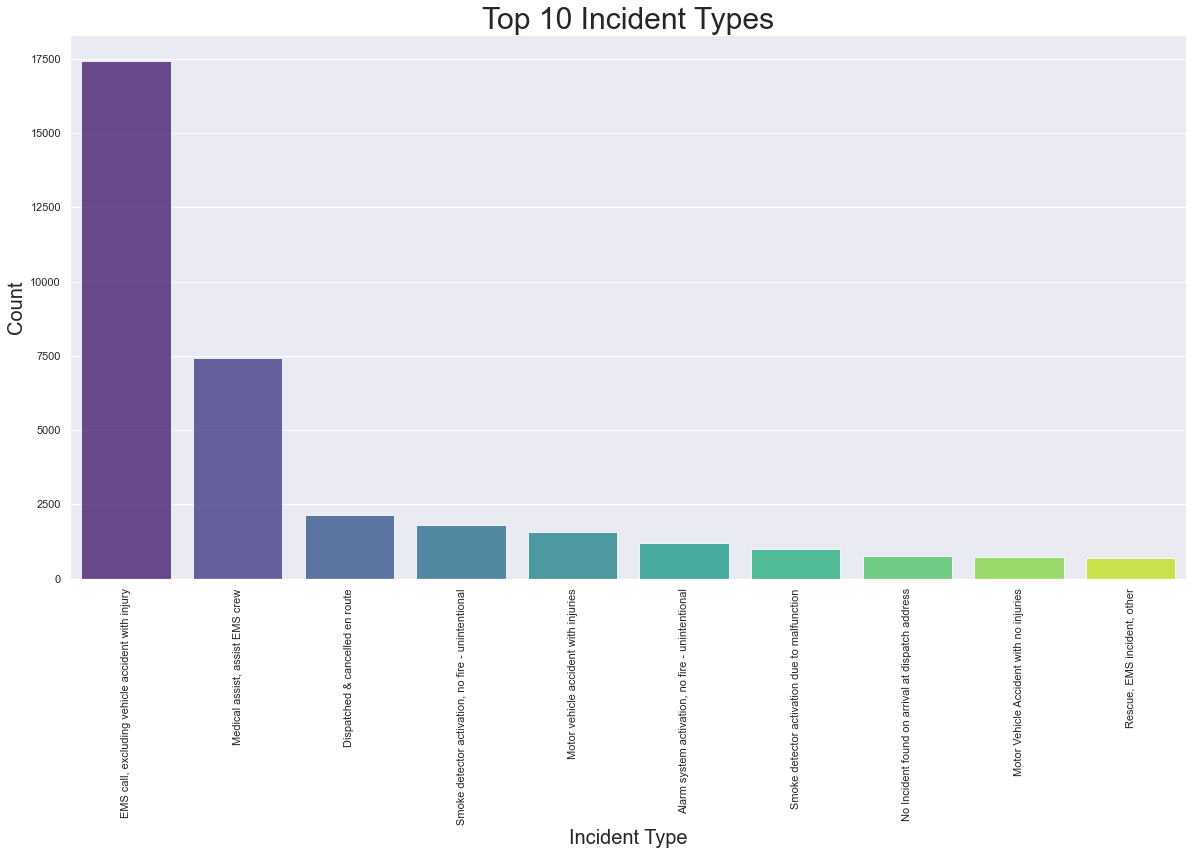

In [30]:
inci_count = df['incitypedesc'].value_counts()
inci_count = inci_count[:10]
plt.figure(figsize=(20,10))
sns.barplot(inci_count.index, inci_count.values, alpha = 0.8, saturation = 1, palette = 'viridis')
plt.title('Top 10 Incident Types', fontsize = 30)
plt.xlabel('Incident Type', fontsize =20)
plt.ylabel('Count', fontsize = 20)
plt.xticks(rotation = 90)
plt.show()

C:\Users\micha\Documents\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


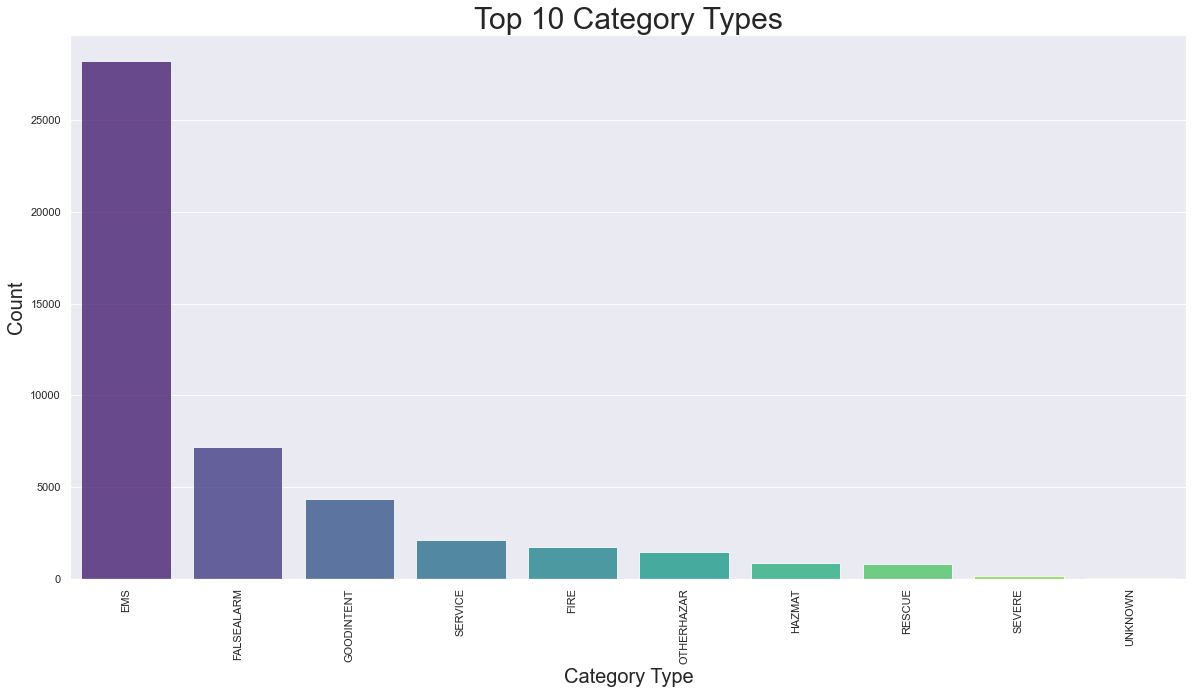

In [37]:
major_count = df['majorcategory'].value_counts()
major_count = major_count[:10]
plt.figure(figsize=(20,10))
sns.barplot(major_count.index, major_count.values, alpha = 0.8, saturation = 1, palette = 'viridis')
plt.title('Top 10 Category Types', fontsize = 30)
plt.xlabel('Category Type', fontsize =20)
plt.ylabel('Count', fontsize = 20)
plt.xticks(rotation = 90)
plt.show()

In [38]:
df['majorcategory'].value_counts()\
                    .head(20)\
                    .to_frame(name = 'Count')\
                    .reset_index()\
                    .style.background_gradient(cmap='Reds', subset= 'Count')

,index,Count
0,EMS,28241
1,FALSEALARM,7189
2,GOODINTENT,4335
3,SERVICE,2121
4,FIRE,1742
5,OTHERHAZAR,1438
6,HAZMAT,845
7,RESCUE,778
8,SEVERE,120
9,UNKNOWN,46


In [31]:
df['incitypedesc'].value_counts()\
                    .head(20)\
                    .to_frame(name = 'Count')\
                    .reset_index()\
                    .style.background_gradient(cmap='Reds', subset = 'Count')

,index,Count
0,"EMS call, excluding vehicle accident with injury",17416
1,"Medical assist, assist EMS crew",7418
2,Dispatched & cancelled en route,2152
3,"Smoke detector activation, no fire - unintentional",1808
4,Motor vehicle accident with injuries,1581
5,"Alarm system activation, no fire - unintentional",1201
6,Smoke detector activation due to malfunction,1019
7,No Incident found on arrival at dispatch address,757
8,Motor Vehicle Accident with no injuries,742
9,"Rescue, EMS incident, other",688


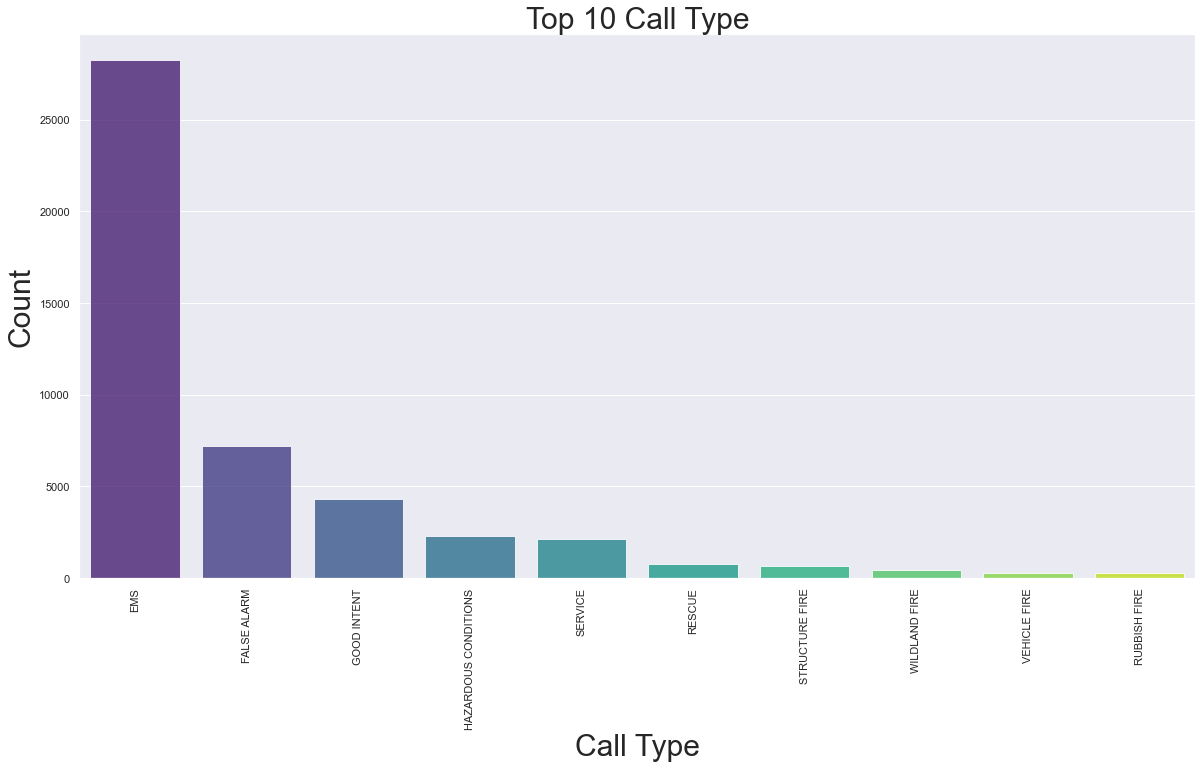

In [32]:
mode_count = df['indicentdesc'].value_counts()
mode_count = mode_count[:10]
sns.barplot(x = mode_count.index, y= mode_count.values, alpha = 0.8, saturation = 1, palette = 'viridis')
plt.title('Top 10 Call Type', fontsize = 30)
plt.xlabel('Call Type', fontsize = 30)
plt.ylabel('Count', fontsize = 30)
plt.xticks(rotation = 90)
plt.show()

In [34]:
df['indicentdesc'].value_counts()\
                    .head(20)\
                    .to_frame(name='Count')\
                    .reset_index()\
                    .style.background_gradient(cmap='Reds', subset='Count')

,index,Count
0,EMS,28241
1,FALSE ALARM,7189
2,GOOD INTENT,4335
3,HAZARDOUS CONDITIONS,2283
4,SERVICE,2121
5,RESCUE,778
6,STRUCTURE FIRE,637
7,WILDLAND FIRE,425
8,VEHICLE FIRE,283
9,RUBBISH FIRE,252


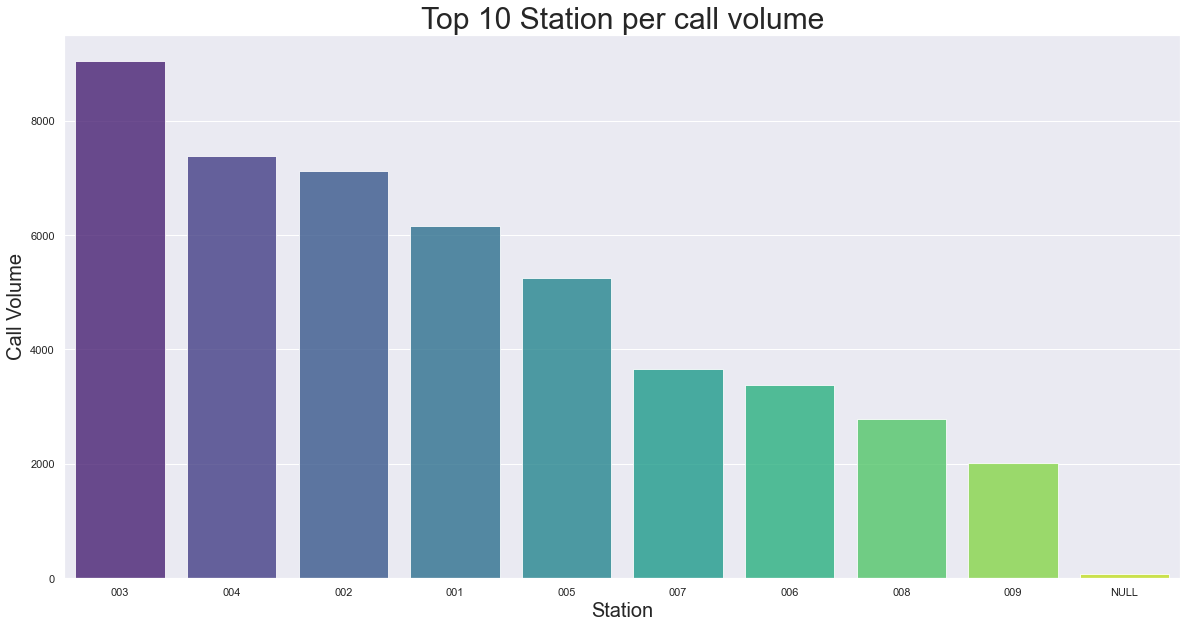

In [35]:
station_count = df['station'].value_counts()
station_count = station_count[:10]
sns.barplot(x= station_count.index, y= station_count.values, alpha =0.8, saturation = 1, palette='viridis')
plt.title('Top 10 Station per call volume', fontsize = 30)
plt.xlabel('Station', fontsize = 20)
plt.ylabel('Call Volume', fontsize = 20)
plt.show()

In [36]:
df['station'].value_counts()\
            .head(20)\
            .to_frame(name='Count')\
            .reset_index()\
            .style.background_gradient(cmap='Reds', subset='Count')

,index,Count
0,003,9049
1,004,7373
2,002,7127
3,001,6151
4,005,5251
5,007,3660
6,006,3371
7,008,2783
8,009,2010
9,NULL,75
